In [64]:
import numpy as np

In [65]:
import pandas as pd

In [66]:
import matplotlib.pyplot as plt

In [67]:
import seaborn as sns

In [68]:
from matplotlib import rcParams

In [69]:
rcParams['figure.figsize'] = 15,5

In [70]:
sns.set_style('darkgrid')

In [71]:
#Logistic Regression

In [72]:
titanic_data = pd.read_csv('titanic.csv')

In [73]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


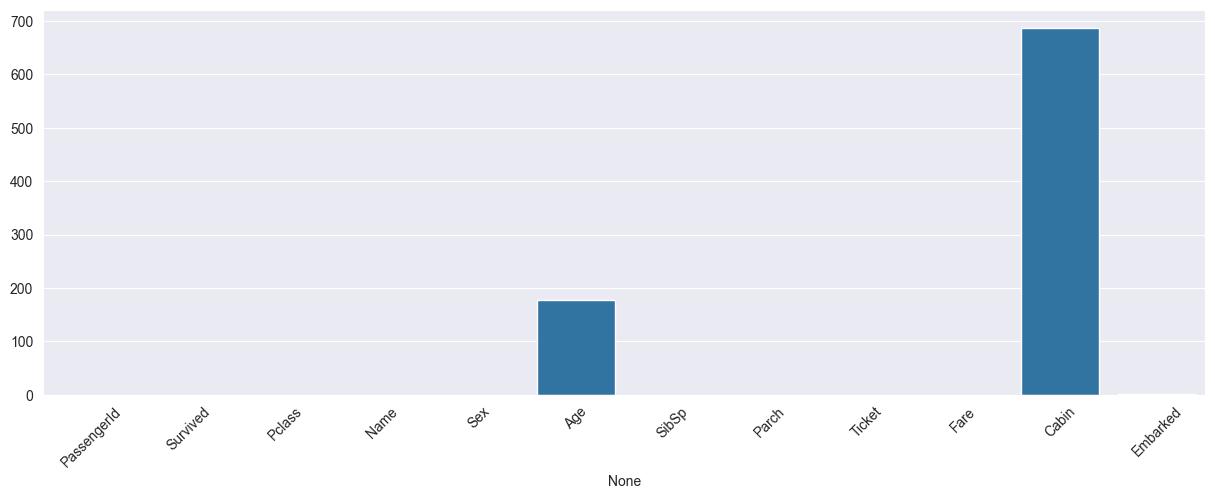

In [76]:
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

In [77]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
titanic_data.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [79]:
titanic_data.isnull().tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,False,False,True,False


In [80]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
titanic_data.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2])

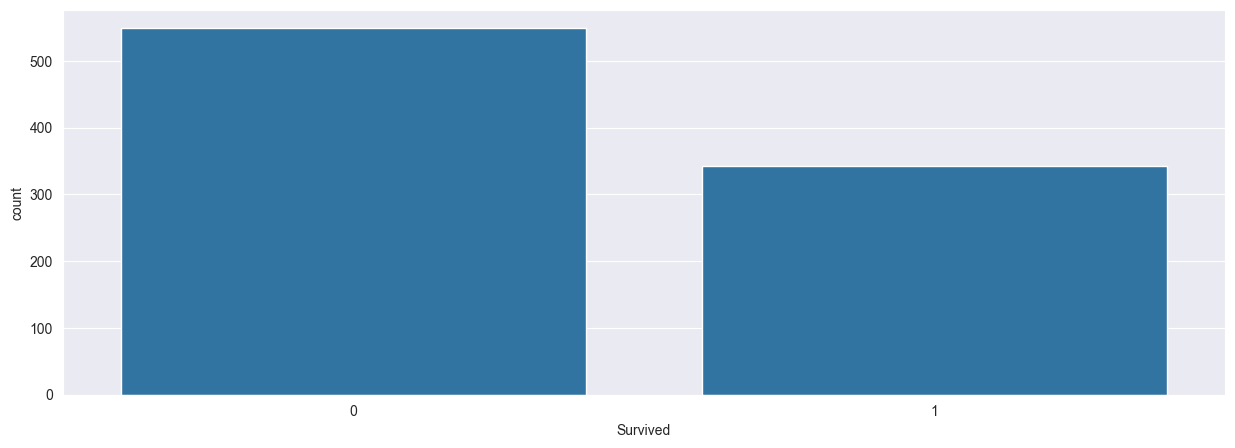

In [82]:
sns.countplot(x = titanic_data['Survived'])
plt.show()

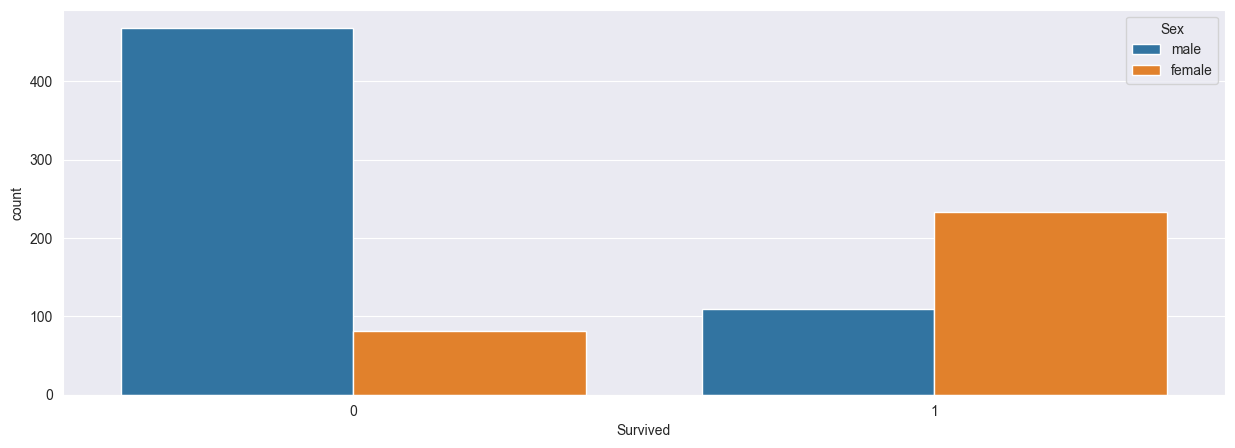

In [83]:
sns.countplot(x = titanic_data['Survived'], hue = 'Sex', data = titanic_data)
plt.show()

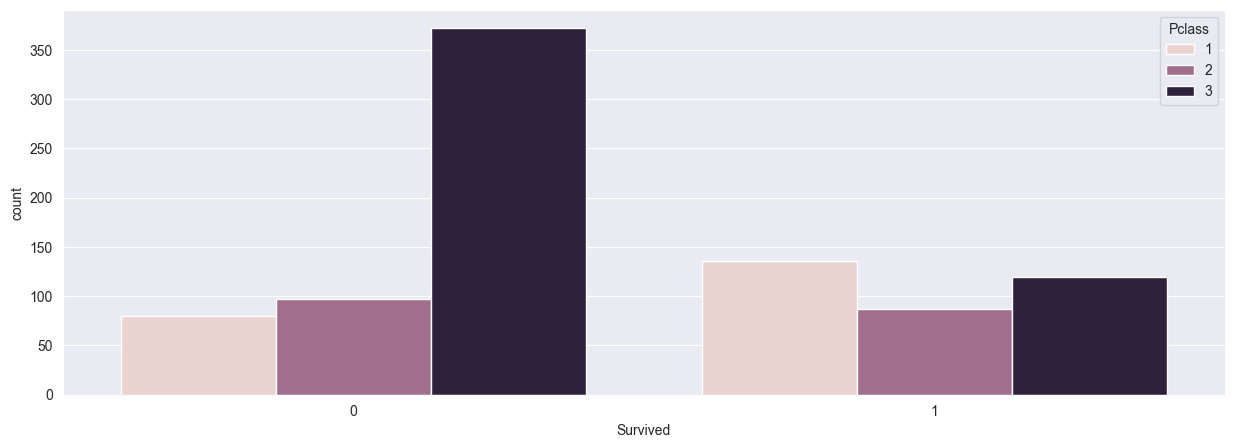

In [84]:
sns.countplot(x = titanic_data['Survived'], hue = 'Pclass', data = titanic_data)
plt.show()

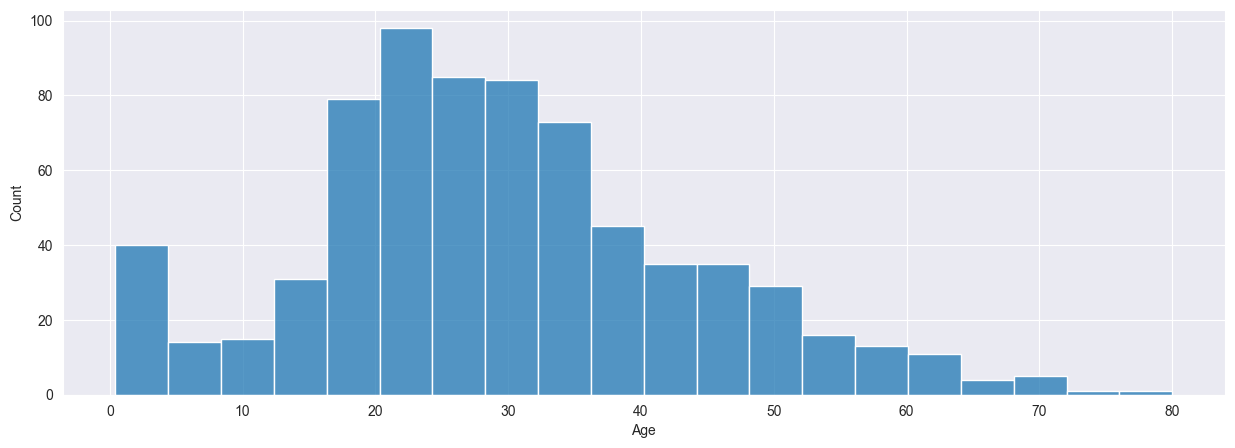

In [85]:
sns.histplot(x = titanic_data['Age'].dropna())
plt.show()

In [86]:
titanic_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

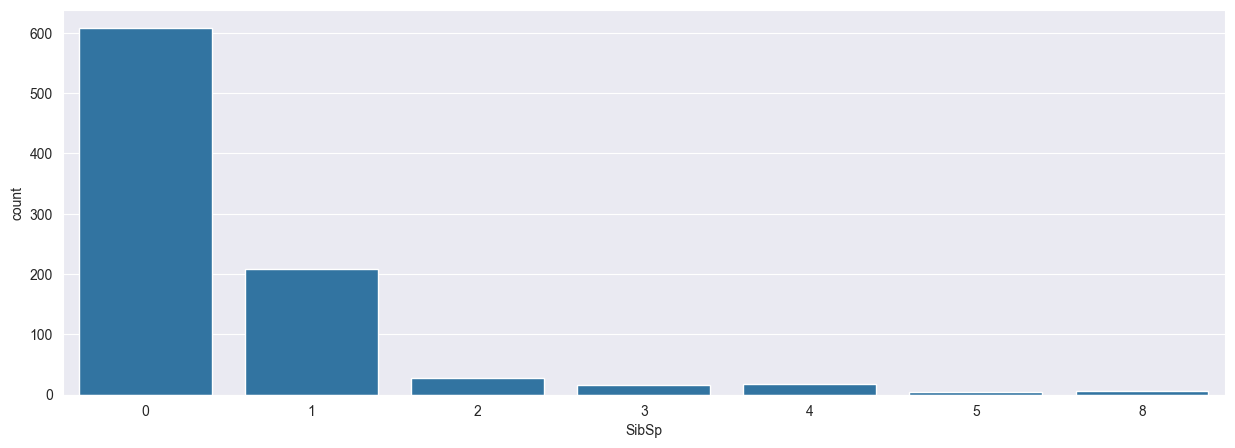

In [87]:
sns.countplot(x = titanic_data['SibSp'], data = titanic_data)
plt.show()

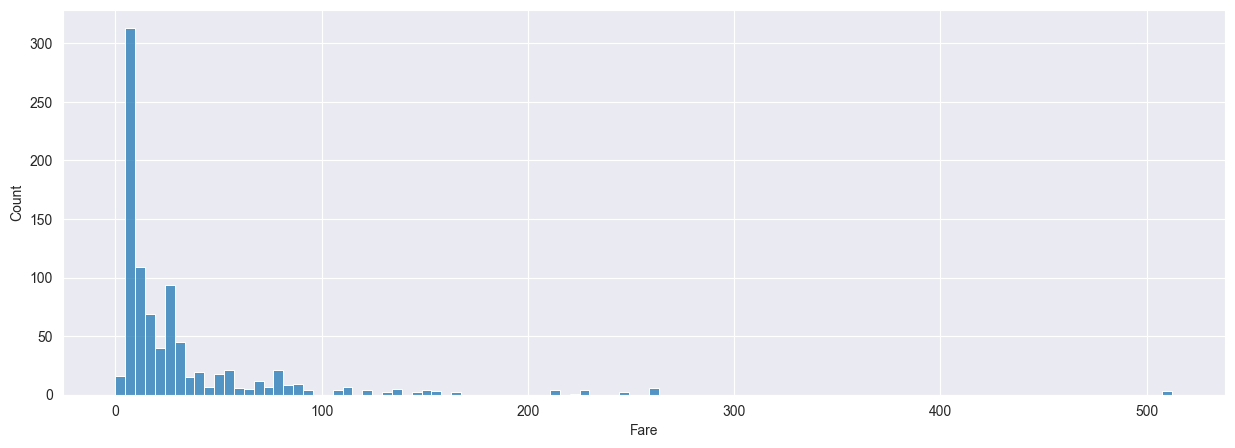

In [88]:
sns.histplot(x = titanic_data['Fare'])
plt.show()

In [89]:
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [90]:
#Data Preprocessing

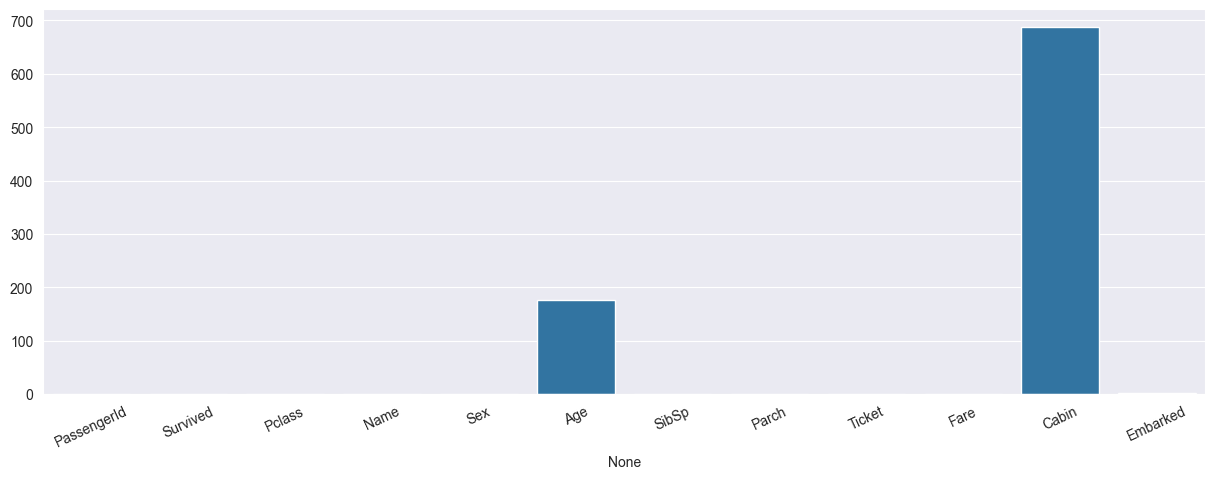

In [91]:
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 25)
plt.show()

In [92]:
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)

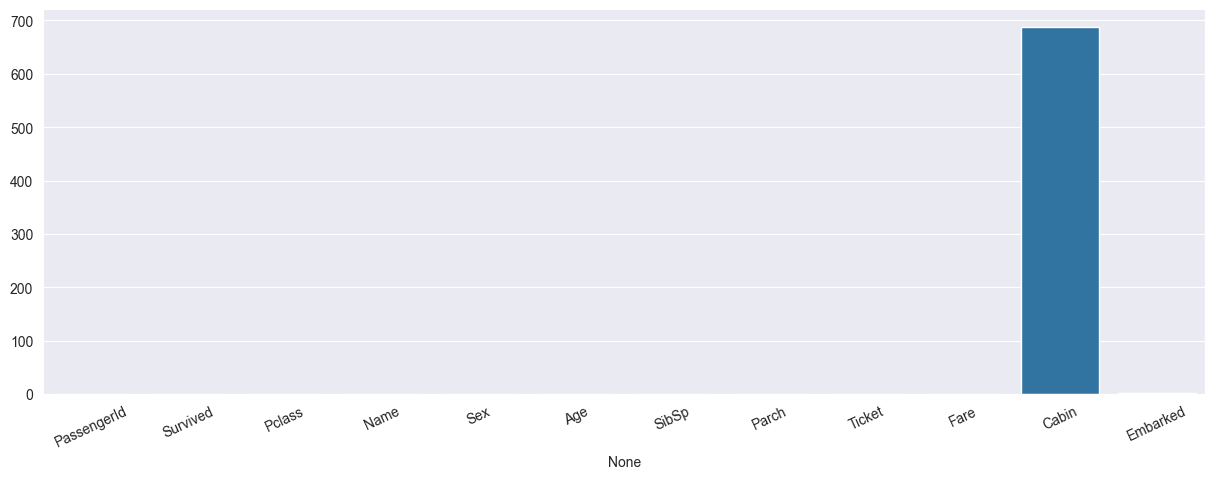

In [93]:
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 25)
plt.show()

In [94]:
titanic_data.drop(labels=['Cabin'], axis=1, inplace=True)
titanic_data.dropna(inplace=True)

In [95]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [96]:
titanic_data = pd.get_dummies(data=titanic_data, columns = ['Sex','Embarked'], drop_first = True)
titanic_data.drop(labels = ['Name','Ticket'], axis=1, inplace=True)

In [97]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [98]:
#Creating our Logistic Regression Model

In [99]:
from sklearn.model_selection import train_test_split

x = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q','Embarked_S']]
y = titanic_data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [100]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [101]:
#Model Evaluation

In [103]:
predictions = logmodel.predict(x_test)

In [104]:
from sklearn.metrics import classification_report

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       170
           1       0.75      0.68      0.71        97

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



In [108]:
print(confusion_matrix(y_test, predictions))

[[148  22]
 [ 31  66]]
